This is my first post on Kaggle, please leave any feedback / areas to improve!

In this notebook, we'll cover some basics of data visualizations, feature engineering, and looking into some CA video patterns.
We'll plot out following
1. the most common types of videos
2. Likes across published months / trending months
3. Correlation between columns
4. Views / likes / dislikes across hours

Please feel free to leave any feedback / areas of improvement that you come across!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json


Import libraries

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import time
import glob
%matplotlib inline

In [3]:
ca = pd.read_csv('/kaggle/input/youtube-new/CAvideos.csv')

In [4]:
ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [5]:
with open('/kaggle/input/youtube-new/US_category_id.json') as f:
    categories = json.load(f)['items']

In [6]:
category_name = {}
for category in categories:
    category_name[int(category['id'])] = category['snippet']['title']
ca['category_name'] = ca['category_id'].map(category_name)

In [7]:
print(category_name)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [8]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [9]:
ca.isnull().sum()
# we see some nulls in the description and category name, let's find out why
# re ran to double check

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
category_name                0
dtype: int64

In [10]:
ca['description'].fillna(value='None',inplace=True)

In [11]:
# converted object to dt obj
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [12]:
# getting months the video was published in
ca['publish_month'] = ca['publish_time'].dt.month

In [13]:
# trending date -> datetime
ca['trending_date'] = pd.to_datetime(ca['trending_date'],format = '%y.%d.%m')
ca['trending_month'] = ca['trending_date'].dt.month

In [14]:
ca.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'publish_month', 'trending_month'],
      dtype='object')

In [15]:
# lets see how many videos are in each category
ca['category_name'].value_counts()

Entertainment            13451
News & Politics           4159
People & Blogs            4105
Comedy                    3773
Music                     3731
Sports                    2787
Film & Animation          2060
Howto & Style             2007
Gaming                    1344
Science & Technology      1155
Education                  991
Travel & Events            392
Pets & Animals             369
Autos & Vehicles           353
Shows                      124
Nonprofits & Activism       74
Movies                       6
Name: category_name, dtype: int64

In [16]:
like_percent = pd.DataFrame((ca['likes'] / ca['views']) * 100)
dislike_percent = pd.DataFrame((ca['dislikes'] / ca['views']) * 100)
ca['like_percent'] = like_percent
ca['dislike_percent'] = dislike_percent

In [17]:
ca['positive_or_negative'] = ca['like_percent'] > ca['dislike_percent']

In [18]:
# comparing the likes to dislikes 
video_feel = []
for item in ca['positive_or_negative']:
    if item == True:
        video_feel.append(1)
    else:
        video_feel.append(0)

In [19]:
ca['positive_or_negative'] = video_feel

In [20]:
ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,publish_month,trending_month,like_percent,dislike_percent,positive_or_negative
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,11,11,4.589104,0.253051,1
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,Comedy,11,11,12.594873,0.166363,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,11,11,4.575843,0.167292,1
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,False,I know it's been a while since we did this sho...,Entertainment,11,11,6.309630,0.094903,1
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,11,11,4.874563,0.062887,1


In [21]:
# reorganize df
ca = ca[['video_id','trending_date','trending_month','title','channel_title',
        'category_id','category_name','publish_time','publish_month','views','positive_or_negative',
        'likes','like_percent','dislikes','dislike_percent','comment_count','thumbnail_link','comments_disabled',
        'ratings_disabled','video_error_or_removed','description']]

In [22]:
ca.head()

,video_id,trending_date,trending_month,title,channel_title,category_id,category_name,publish_time,publish_month,views,...,likes,like_percent,dislikes,dislike_percent,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,11,17158579,...,787425,4.589104,43420,0.253051,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,11,1014651,...,127794,12.594873,1688,0.166363,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,11,3191434,...,146035,4.575843,5339,0.167292,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,11,2095828,...,132239,6.309630,1989,0.094903,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,11,33523622,...,1634130,4.874563,21082,0.062887,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


# Visualizations

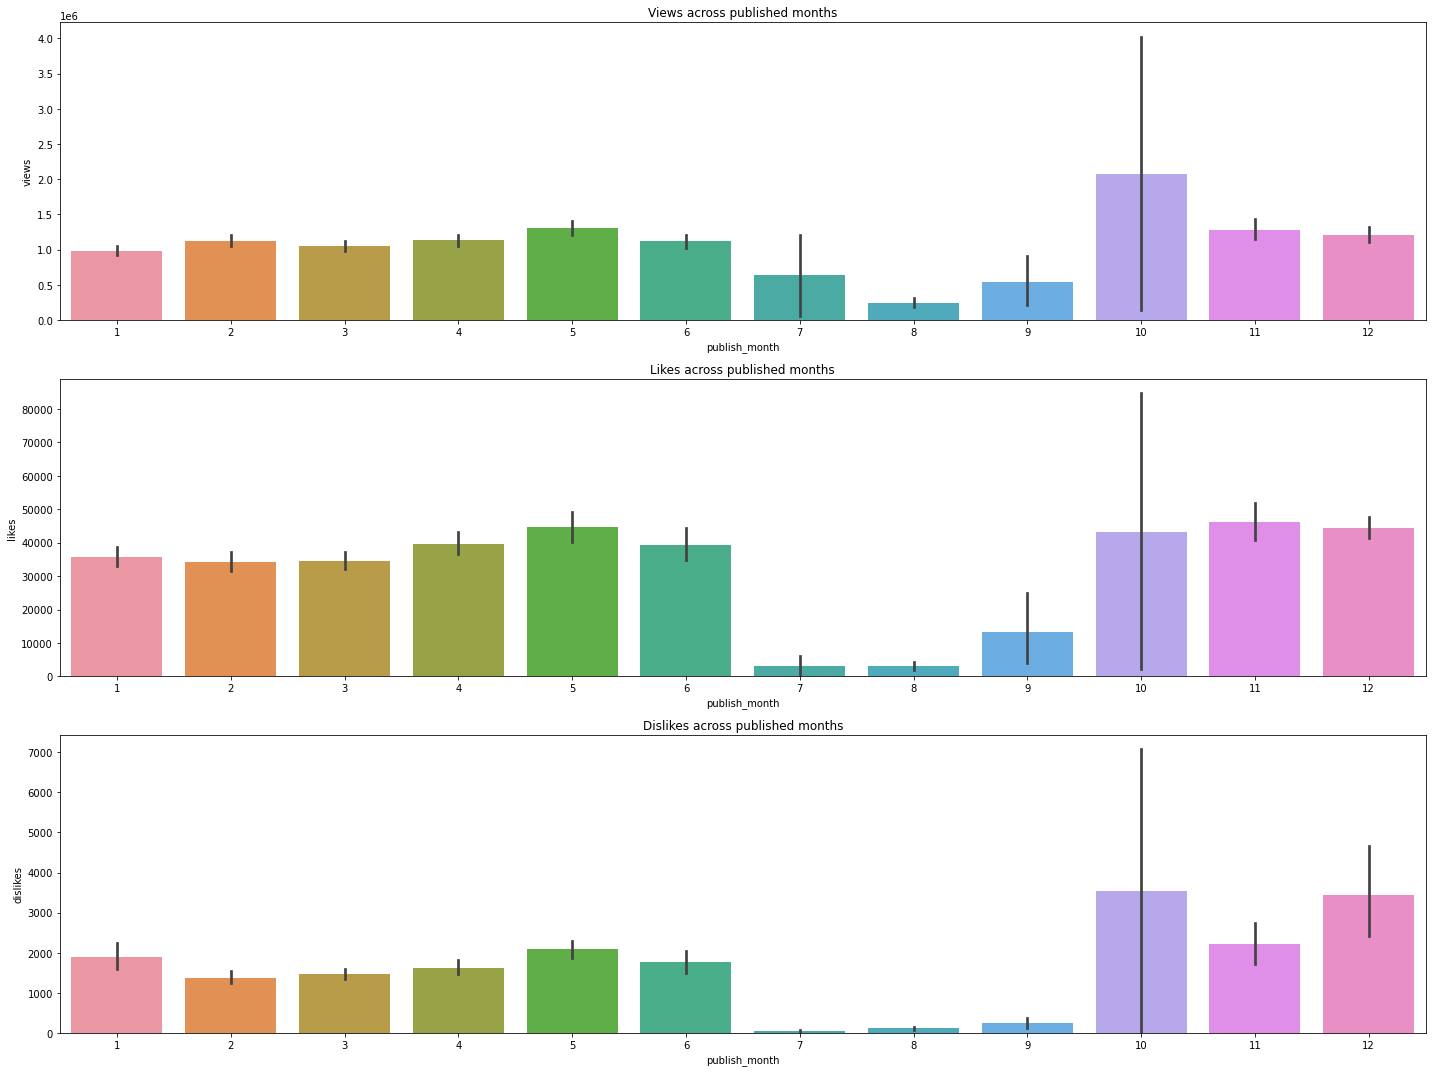

In [23]:
f, ax = plt.subplots(3,1,figsize=(20,15))
g = sns.barplot(x=ca['publish_month'],y=ca['views'],data=ca,ax=ax[0])
g.set_title('Views across published months')
g1 = sns.barplot(x=ca['publish_month'],y=ca['likes'],data=ca,ax=ax[1])
g1.set_title('Likes across published months')
g2 = sns.barplot(x=ca['publish_month'],y=ca['dislikes'],data=ca,ax=ax[2])
g2.set_title('Dislikes across published months')
plt.tight_layout()

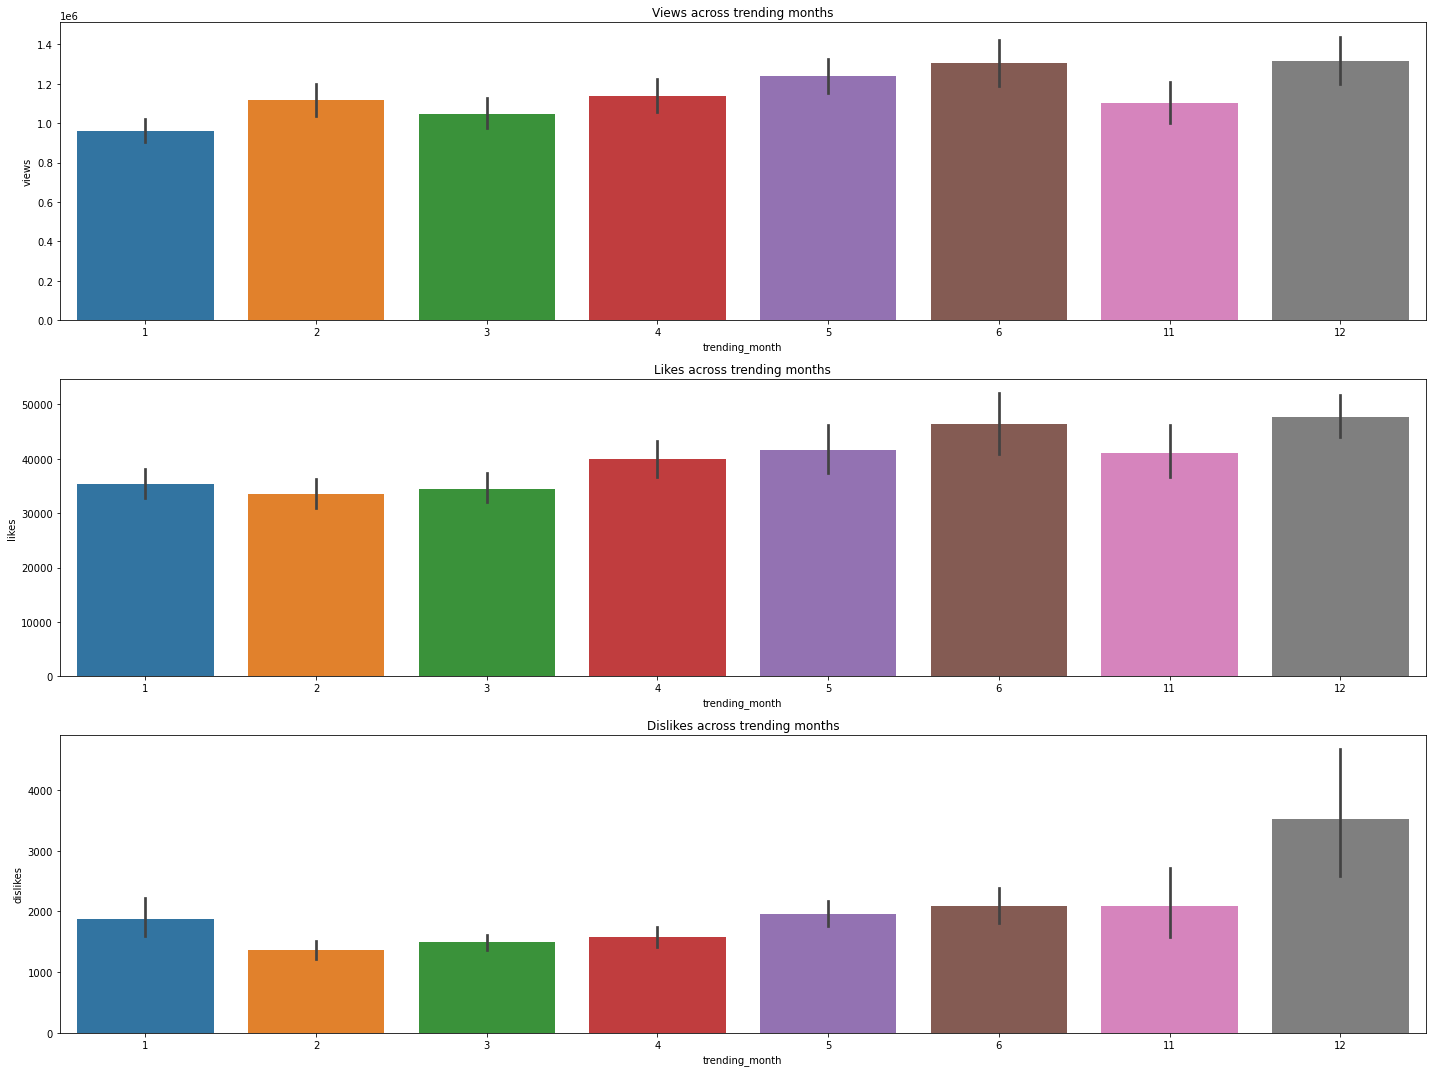

In [24]:
f, ax = plt.subplots(3,1,figsize=(20,15))
g = sns.barplot(x=ca['trending_month'],y=ca['views'],data=ca,ax=ax[0])
g.set_title('Views across trending months')
g1 = sns.barplot(x=ca['trending_month'],y=ca['likes'],data=ca,ax=ax[1])
g1.set_title('Likes across trending months')
g2 = sns.barplot(x=ca['trending_month'],y=ca['dislikes'],data=ca,ax=ax[2])
g2.set_title('Dislikes across trending months')
plt.tight_layout()

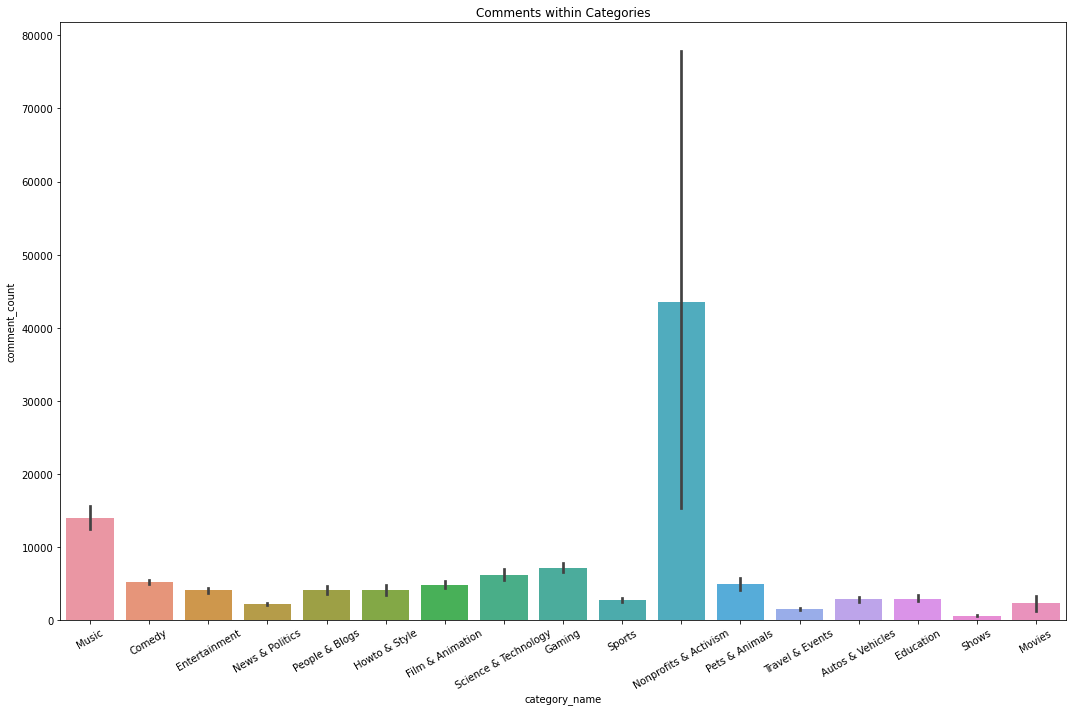

In [25]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=ca['category_name'],y=ca['comment_count'],data=ca)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Comments within Categories')
plt.tight_layout()
# it looks like non profits seem to have the most 'comment' activities

(13.5, -0.5)

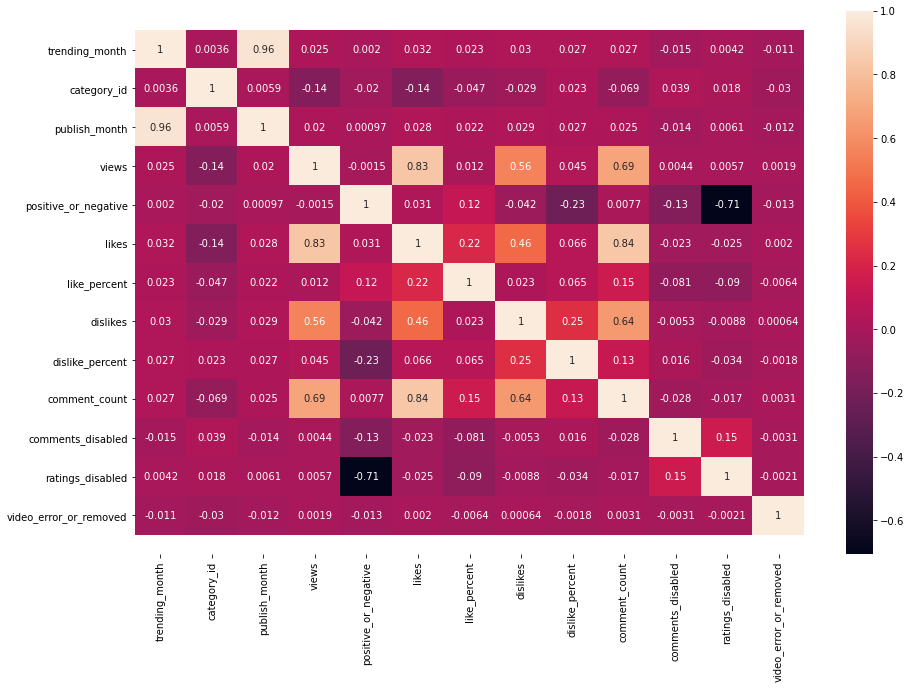

In [26]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(ca.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

It looks like views, likes, dislikes and comment_count are all relativley correlated, lets take a deeper look

In [27]:
corr_list = ca[['views','likes','dislikes','comment_count']]

(4.5, -0.5)

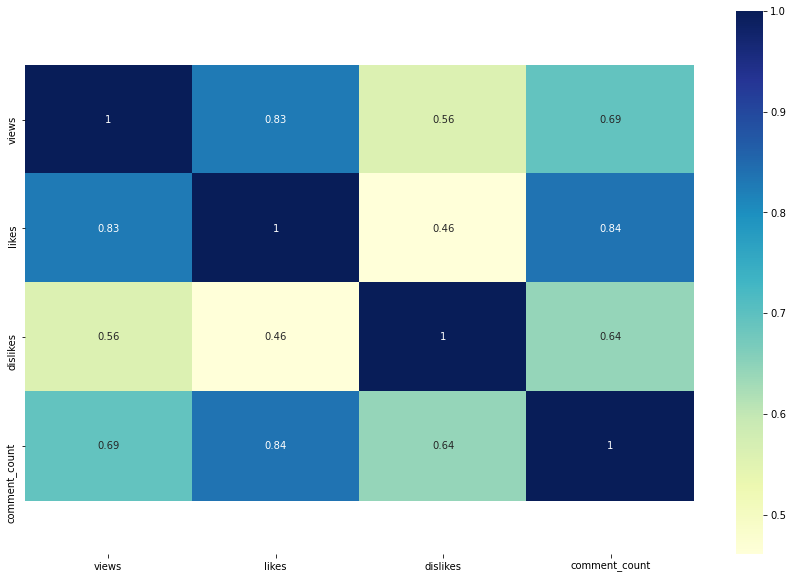

In [28]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=corr_list.corr(),cmap='YlGnBu',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


Text(0.5, 1.0, 'Correlation of Likes and Dislikes')

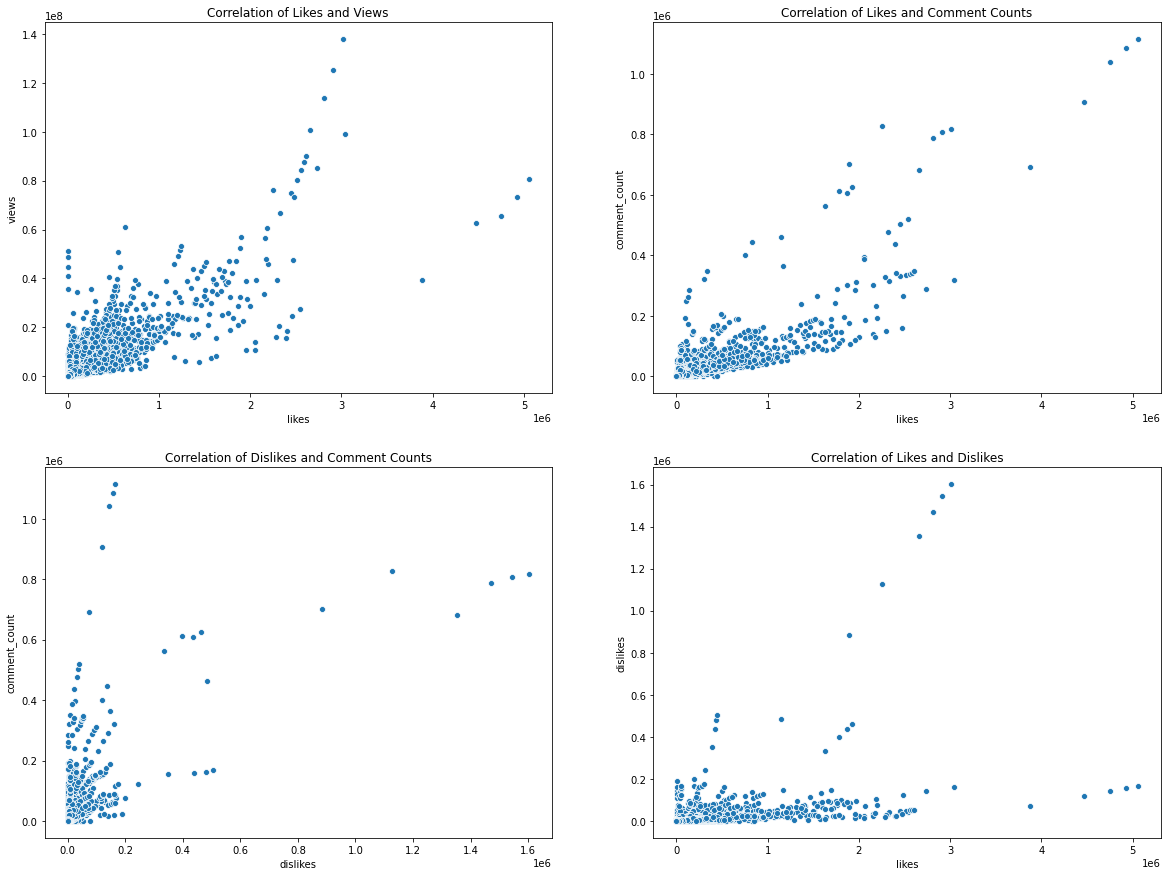

In [29]:
f, ax = plt.subplots(2,2,figsize=(20,15))
# 1st chart (likes : views)
g = sns.scatterplot(x=ca['likes'],y=ca['views'],data=ca,ax=ax[0][0])
g.set_title('Correlation of Likes and Views')
# 2nd chart (likes : communt_count)
g1 = sns.scatterplot(x=ca['likes'],y=ca['comment_count'],data=ca,ax=ax[0][1])
g1.set_title('Correlation of Likes and Comment Counts')
# 3rd chart (comment_count : dislikes)
g2 = sns.scatterplot(x=ca['dislikes'],y=ca['comment_count'],data=ca,ax=ax[1][0])
g2.set_title('Correlation of Dislikes and Comment Counts')
# 4th chart (likes : dislikes)
g3 = sns.scatterplot(x=ca['likes'],y=ca['dislikes'],data=ca,ax=ax[1][1])
g3.set_title('Correlation of Likes and Dislikes')

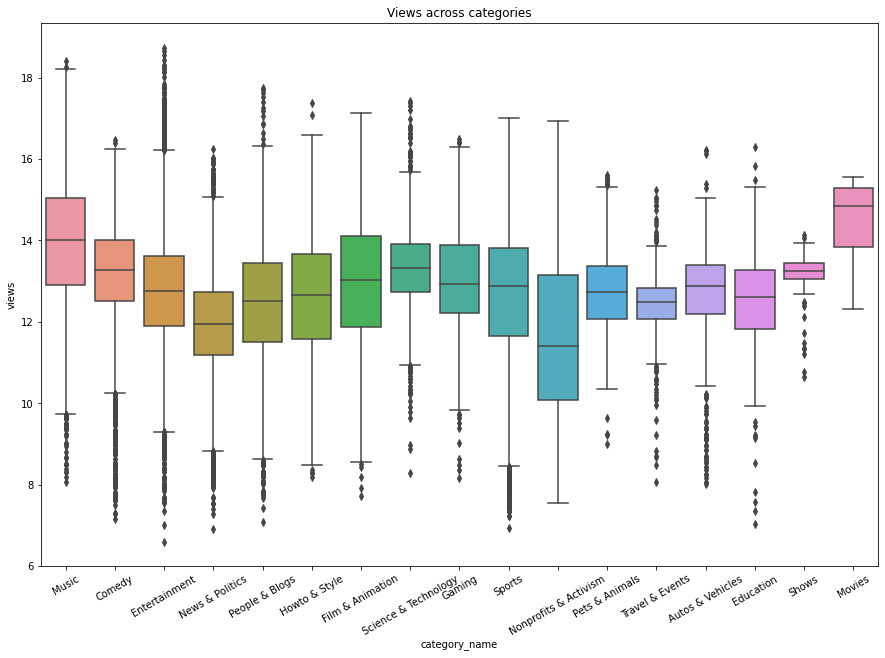

In [30]:
plt.figure(figsize=(15,10))
g = sns.boxplot(x=ca['category_name'],y=np.log(ca['views']),data=ca)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Views across categories')
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


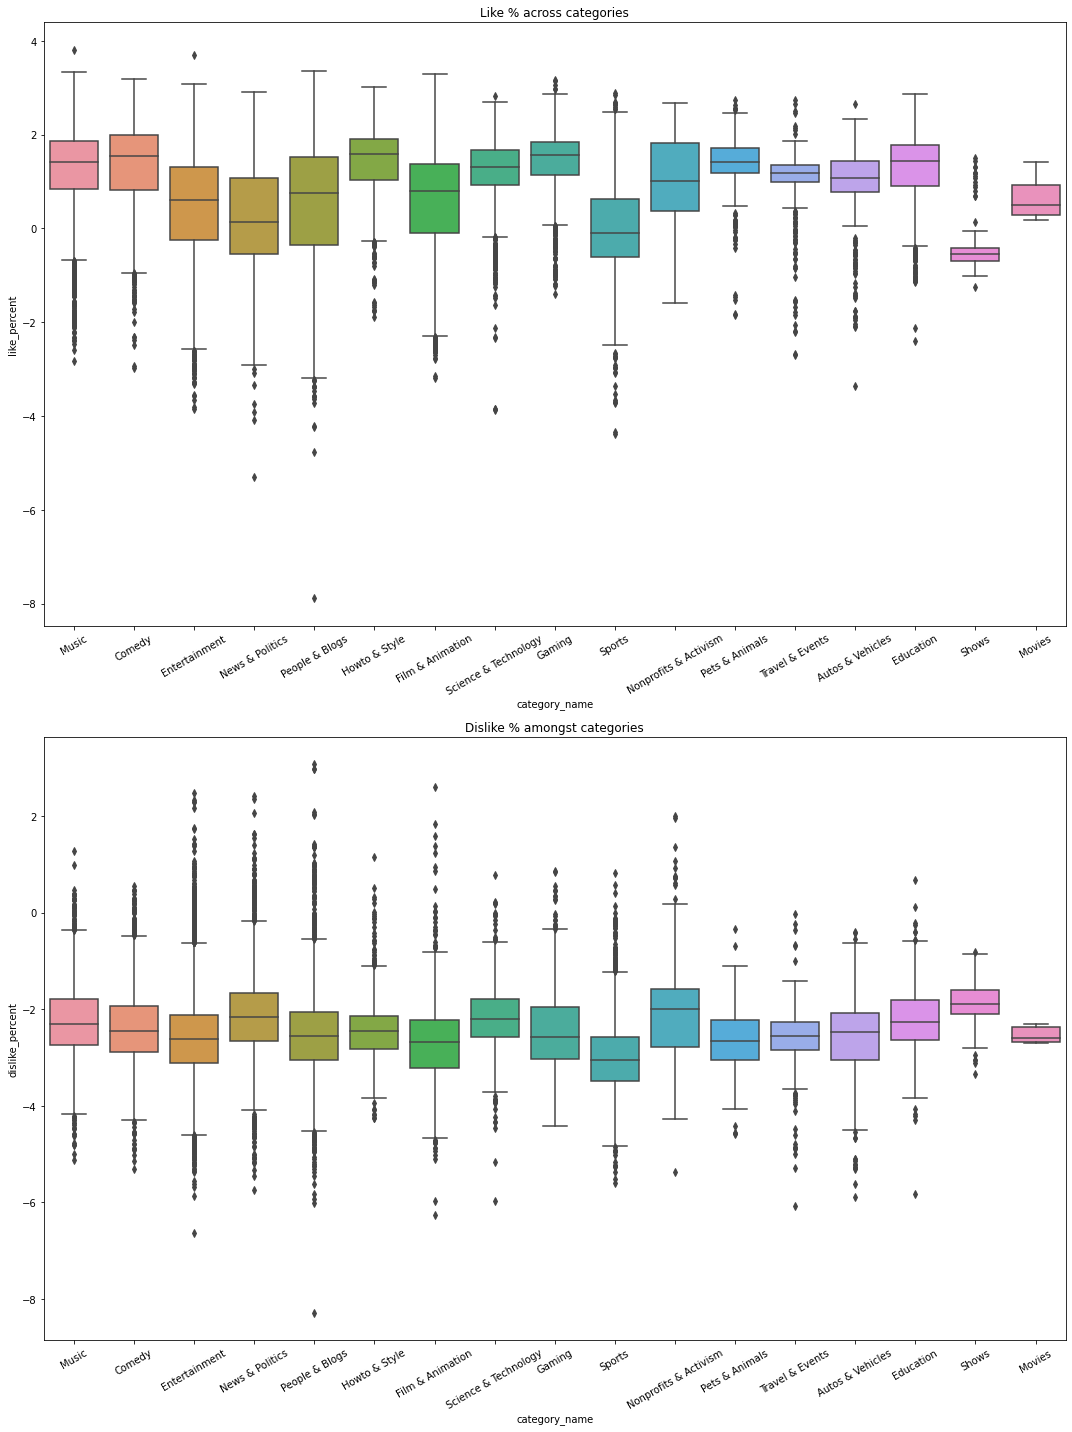

In [31]:
f, ax = plt.subplots(2,1,figsize=(15,20))
g1 = sns.boxplot(x=ca['category_name'],y=(np.log(ca['like_percent'])),data=ca,ax=ax[0])
g1.set_xticklabels(g.get_xticklabels(),rotation=30)
g1.set_title('Like % across categories')
plt.tight_layout()
g2 = sns.boxplot(x=ca['category_name'],y=(np.log(ca['dislike_percent'])),data=ca,ax=ax[1])
g2.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Dislike % amongst categories')
plt.tight_layout()

It looks like music category seems to have the highest engagment rate of all
In the dislike % we see a few outliers in 'people & blogs' -> besides that the dislike % is relatively low

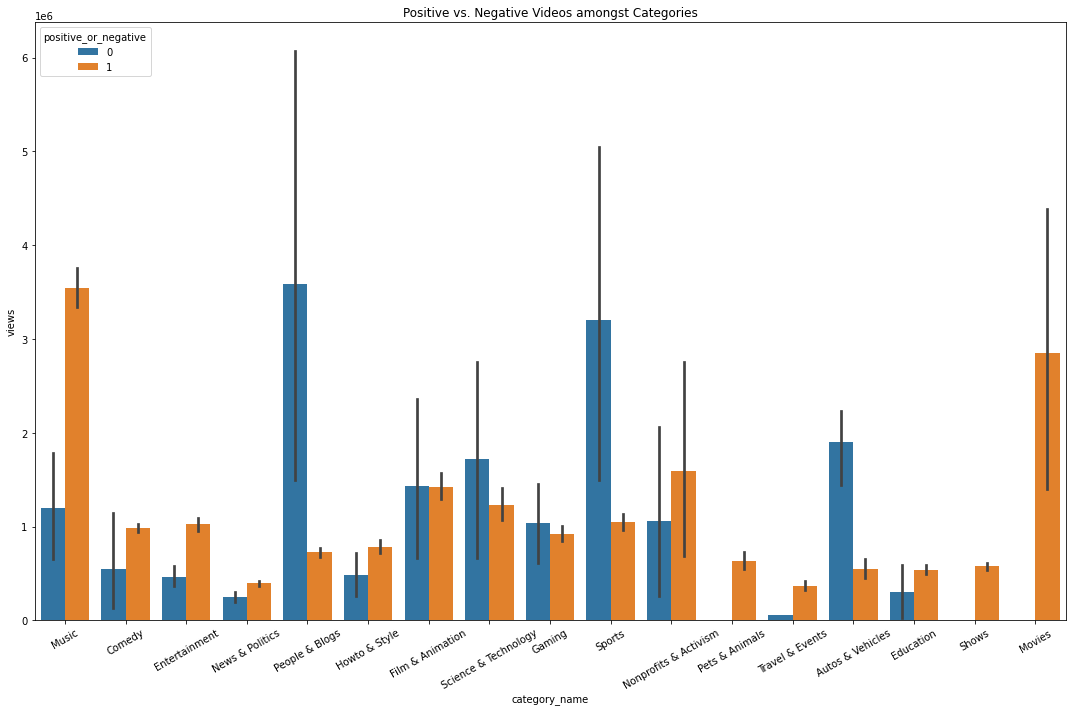

In [32]:
plt.figure(figsize=(15,10))
g = sns.barplot(x=ca['category_name'],y=ca['views'],hue=ca['positive_or_negative'],data=ca)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Positive vs. Negative Videos amongst Categories')
plt.tight_layout()

so here we see a clear different in 'people & blogs', 'sports', and 'Autos & Vehicles'
it looks like videos in these categories are generally more negative than positive

# Finding what hour videos are usually 'published'

In [33]:
ca.head()

,video_id,trending_date,trending_month,title,channel_title,category_id,category_name,publish_time,publish_month,views,...,likes,like_percent,dislikes,dislike_percent,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,11,17158579,...,787425,4.589104,43420,0.253051,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,11,1014651,...,127794,12.594873,1688,0.166363,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,11,3191434,...,146035,4.575843,5339,0.167292,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,11,2095828,...,132239,6.309630,1989,0.094903,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,11,33523622,...,1634130,4.874563,21082,0.062887,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [34]:
# so this gives us the hour, min, and seconds of the videos that are published
ca[['hours','minutes','seconds']] = ca['publish_time'].dt.time.astype(str).str.split(':', expand=True)

Text(0.5, 1.0, 'Comment counts across hours')

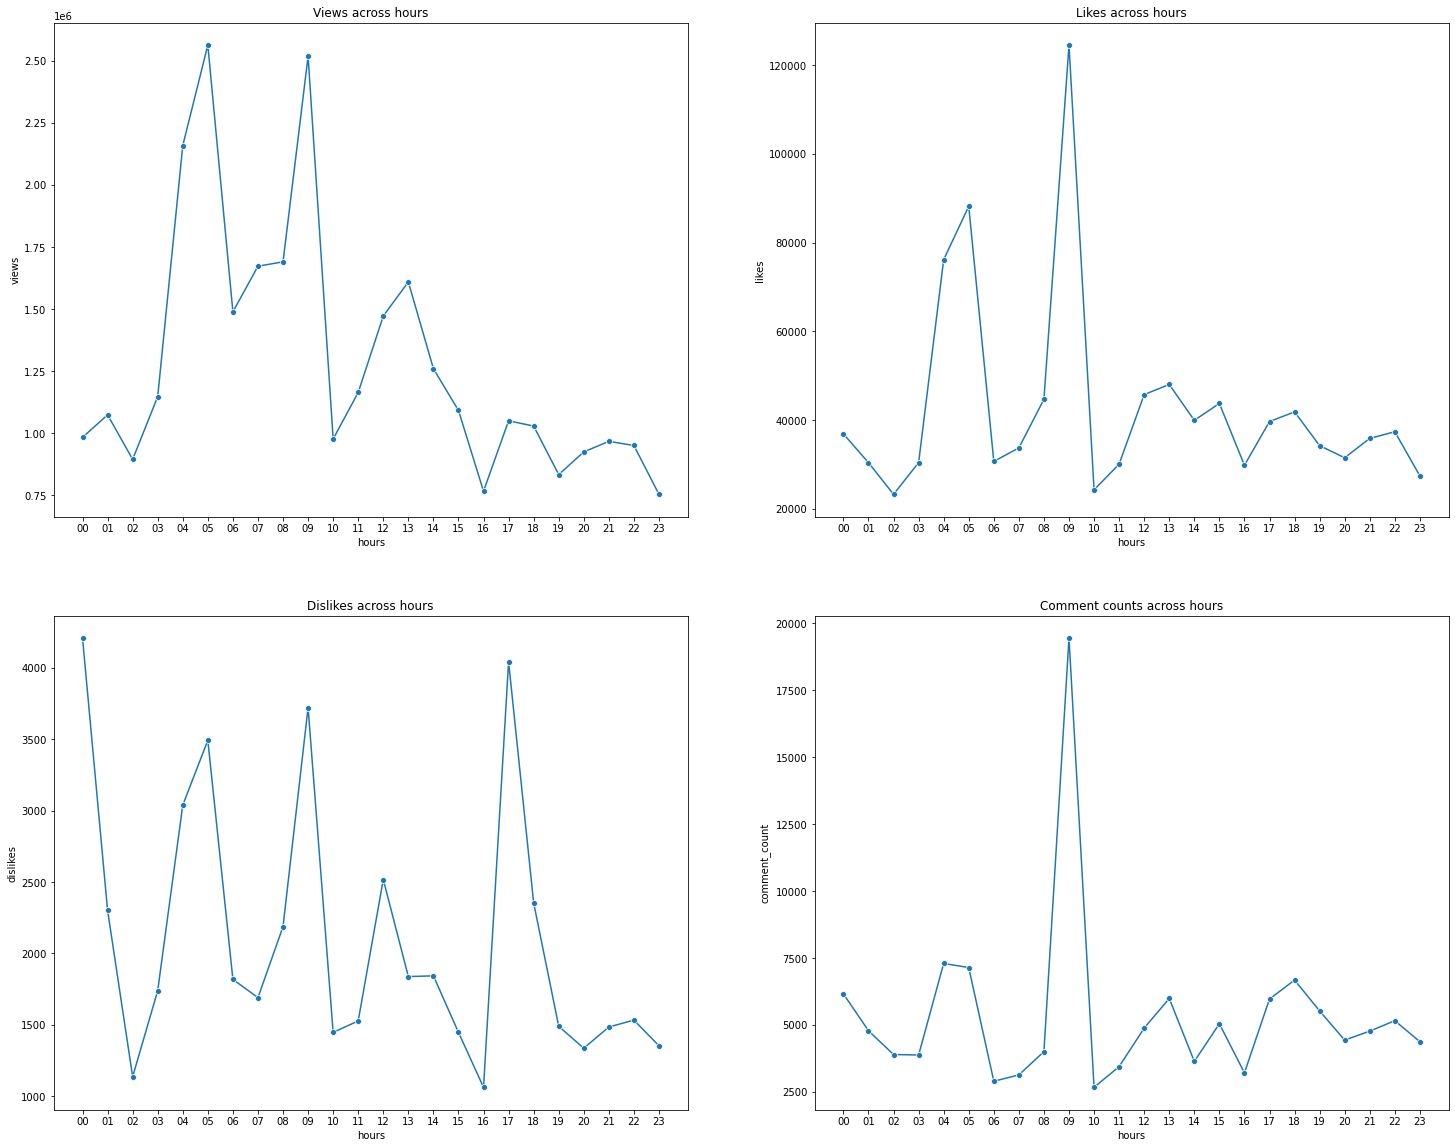

In [35]:
f, ax = plt.subplots(2,2,figsize=(25,20))
g = sns.lineplot(x=ca['hours'],y=ca['views'],data=ca,marker = 'o',ci=None,ax=ax[0][0])
g.set_title('Views across hours')
g1 = sns.lineplot(x=ca['hours'],y=ca['likes'],data=ca,marker = 'o',ci=None,ax=ax[0][1])
g1.set_title('Likes across hours')
g2 = sns.lineplot(x=ca['hours'],y=ca['dislikes'],data=ca,marker = 'o',ci=None,ax=ax[1][0])
g2.set_title('Dislikes across hours')
g3 = sns.lineplot(x=ca['hours'],y=ca['comment_count'],data=ca,marker = 'o',ci=None,ax=ax[1][1])
g3.set_title('Comment counts across hours')

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Amount of views by Month')

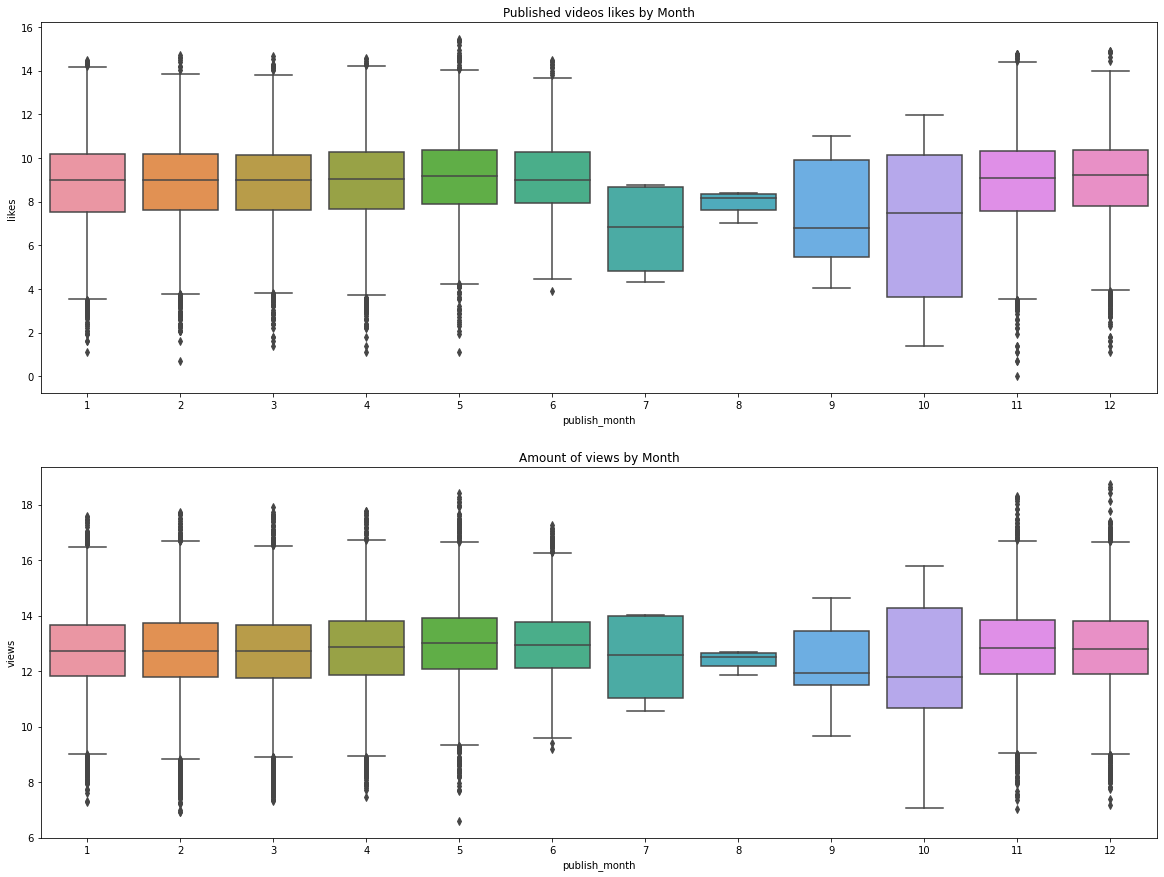

In [36]:
f, ax = plt.subplots(2,1,figsize=(20,15))
g = sns.boxplot(x=ca['publish_month'],y=np.log(ca['likes']),data=ca,ax=ax[0])
g.set_title('Published videos likes by Month')
g1 = sns.boxplot(x=ca['publish_month'],y=np.log(ca['views']),data=ca,ax=ax[1])
g1.set_title('Amount of views by Month')

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of views by Hour')

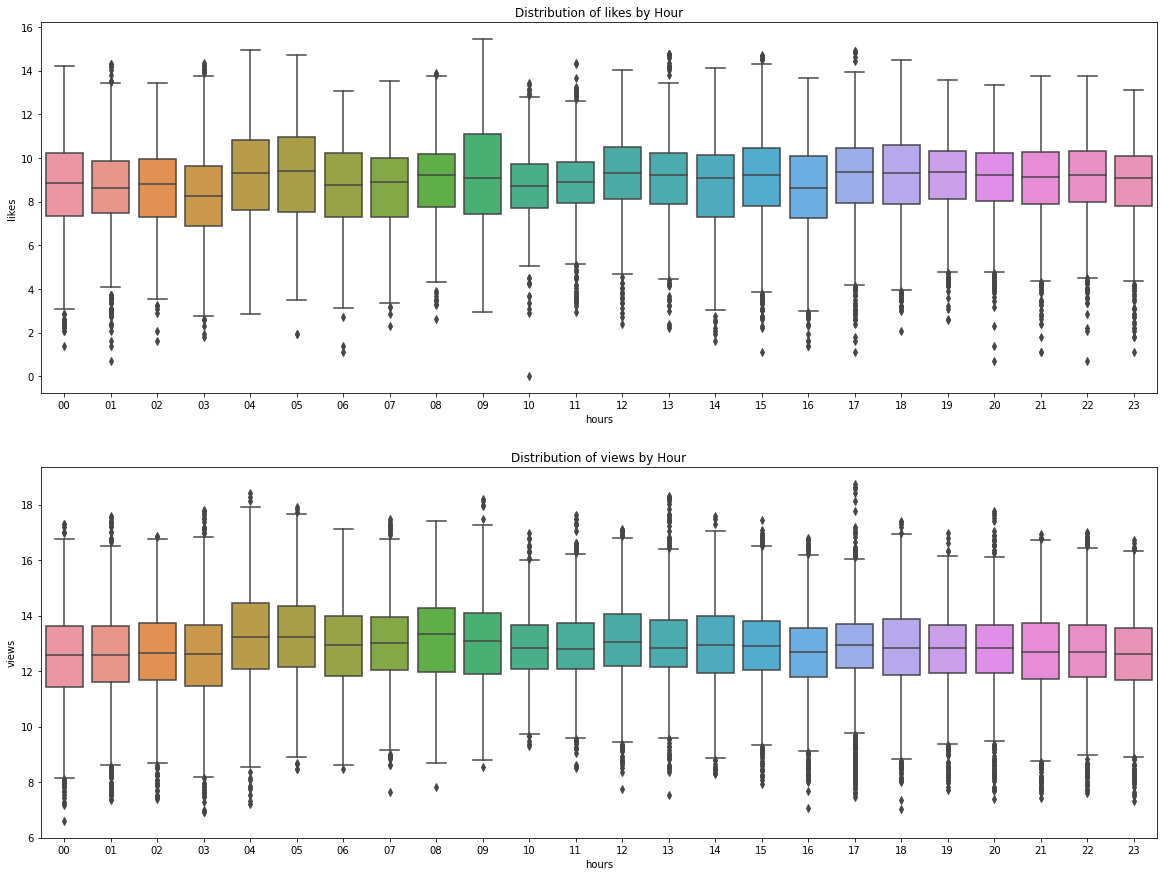

In [37]:
f, ax = plt.subplots(2,1,figsize=(20,15))
g = sns.boxplot(x=(ca['hours']),y=np.log(ca['likes']),data=ca,ax=ax[0])
g.set_title('Distribution of likes by Hour')
g1 = sns.boxplot(x=ca['hours'],y=np.log(ca['views']),data=ca,ax=ax[1])
g1.set_title('Distribution of views by Hour')

# Predicting amount of likes for a video

In [38]:
ca.head(1)

,video_id,trending_date,trending_month,title,channel_title,category_id,category_name,publish_time,publish_month,views,...,dislike_percent,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hours,minutes,seconds
0,n1WpP7iowLc,2017-11-14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,11,17158579,...,0.253051,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,17,00,03


In [39]:
ca.describe()

,trending_month,category_id,publish_month,views,positive_or_negative,likes,like_percent,dislikes,dislike_percent,comment_count
count,40881.000000,40881.000000,40881.000000,4.088100e+04,40881.000000,4.088100e+04,40881.000000,4.088100e+04,40881.000000,4.088100e+04
mean,5.234143,20.795553,5.273183,1.147036e+06,0.986424,3.958269e+04,3.341188,2.009195e+03,0.132381,5.042975e+03
std,3.826237,6.775054,3.852069,3.390913e+06,0.115724,1.326895e+05,3.077632,1.900837e+04,0.321985,2.157902e+04
min,1.000000,1.000000,1.000000,7.330000e+02,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,20.000000,2.000000,1.439020e+05,1.000000,2.191000e+03,0.939988,9.900000e+01,0.049934,4.170000e+02
50%,4.000000,24.000000,4.000000,3.712040e+05,1.000000,8.780000e+03,2.512198,3.030000e+02,0.080368,1.301000e+03
75%,6.000000,24.000000,6.000000,9.633020e+05,1.000000,2.871700e+04,4.823377,9.500000e+02,0.135348,3.713000e+03
max,12.000000,43.000000,12.000000,1.378431e+08,1.000000,5.053338e+06,45.050857,1.602383e+06,21.558033,1.114800e+06


In [40]:
ca.columns
# our x & y
# the y will be -> likes
# the x will be -> trending month, publish month, views, disklikes, and comment_count

Index(['video_id', 'trending_date', 'trending_month', 'title', 'channel_title',
       'category_id', 'category_name', 'publish_time', 'publish_month',
       'views', 'positive_or_negative', 'likes', 'like_percent', 'dislikes',
       'dislike_percent', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'hours', 'minutes', 'seconds'],
      dtype='object')

In [41]:
df = ca[['category_id','trending_date','trending_month','publish_time','publish_month','category_id','views','likes','dislikes',
         'positive_or_negative','comment_count']]

In [42]:
df['views_log'] = np.log(df['views'])
df['likes_log'] = np.log(df['likes'])
df['dislikes_log'] = np.log(df['dislikes'])
df['comment_count_log'] = np.log(df['comment_count'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWit

In [43]:
df.head()

,category_id,trending_date,trending_month,publish_time,publish_month,category_id,views,likes,dislikes,positive_or_negative,comment_count,views_log,likes_log,dislikes_log,comment_count_log
0,10,2017-11-14,11,2017-11-10 17:00:03,11,10,17158579,787425,43420,1,125882,16.658009,13.576523,10.678675,11.743100
1,23,2017-11-14,11,2017-11-13 17:00:00,11,23,1014651,127794,1688,1,13030,13.830055,11.758175,7.431300,9.475010
2,23,2017-11-14,11,2017-11-12 19:05:24,11,23,3191434,146035,5339,1,8181,14.975981,11.891602,8.582794,9.009570
3,24,2017-11-14,11,2017-11-12 18:01:41,11,24,2095828,132239,1989,1,17518,14.555459,11.792366,7.595387,9.770984
4,10,2017-11-14,11,2017-11-09 11:04:14,11,10,33523622,1634130,21082,1,85067,17.327761,14.306621,9.956175,11.351194


In [44]:
X = df[['trending_month','publish_month','category_id','positive_or_negative',
        'views','dislikes','comment_count']]
y = df['likes']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [49]:
fit_model = lm.fit(X_train,y_train)

In [50]:
print(lm.intercept_)

-4654.006521043135


In [51]:
lm.coef_

array([ 3.56976322e+02, -7.30315301e+01, -3.33501868e+02, -3.33501868e+02,
        1.75140838e+04,  2.00275620e-02, -1.69762215e+00,  3.95816743e+00])

In [52]:
X_train.columns

Index(['trending_month', 'publish_month', 'category_id', 'category_id',
       'positive_or_negative', 'views', 'dislikes', 'comment_count'],
      dtype='object')

In [53]:
cdf = pd.DataFrame(lm.coef_,index = X_train.columns,columns=['Coefficients'])

In [54]:
cdf

,Coefficients
trending_month,356.976322
publish_month,-73.031530
category_id,-333.501868
category_id,-333.501868
positive_or_negative,17514.083770
views,0.020028
dislikes,-1.697622
comment_count,3.958167


In [55]:
predictions = lm.predict(X_test)

In [56]:
predictions

array([ 5706.79212954,  4408.32877585, 18451.08649347, ...,
         517.32932273, 10941.5581033 , 12156.87342121])

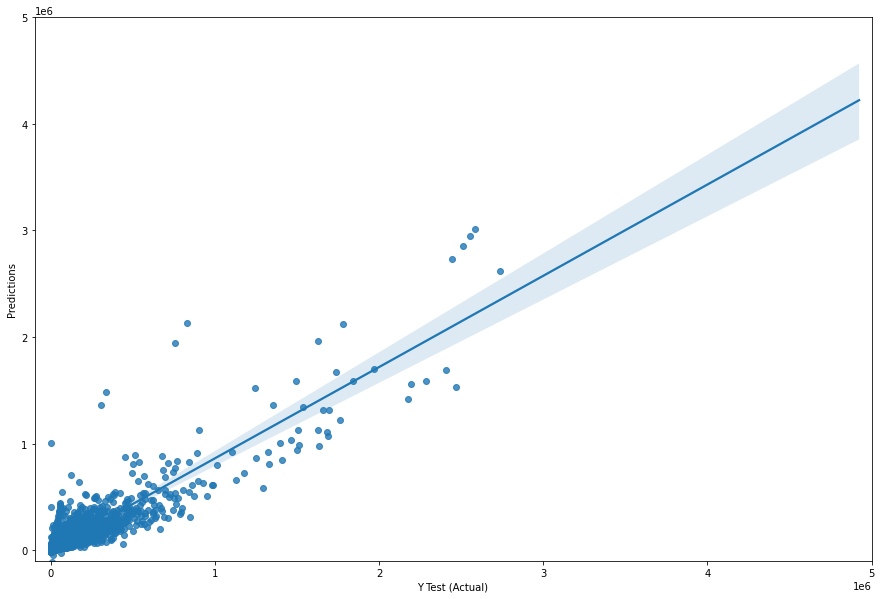

In [57]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test,predictions,fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000,5000000),ylim=(-100000,5000000))
plt.show(g)

In [58]:
residuals = (y_test - predictions)
print(residuals)

38057     4813.207870
6392      2390.671224
4783     -3427.086493
7168    -22183.442383
5233      5054.775067
             ...     
9875     13932.392603
18566     1183.623484
19244      432.670677
19772    10494.441897
9129      6169.126579
Name: likes, Length: 12265, dtype: float64


In [59]:
residuals.mean()

-582.2312918051497

[(-500000.0, 500000.0)]

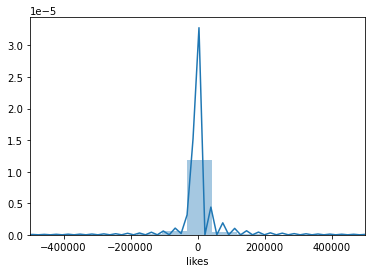

In [60]:
g = sns.distplot(residuals,bins=30)
g.set(xlim=(-500000,500000))

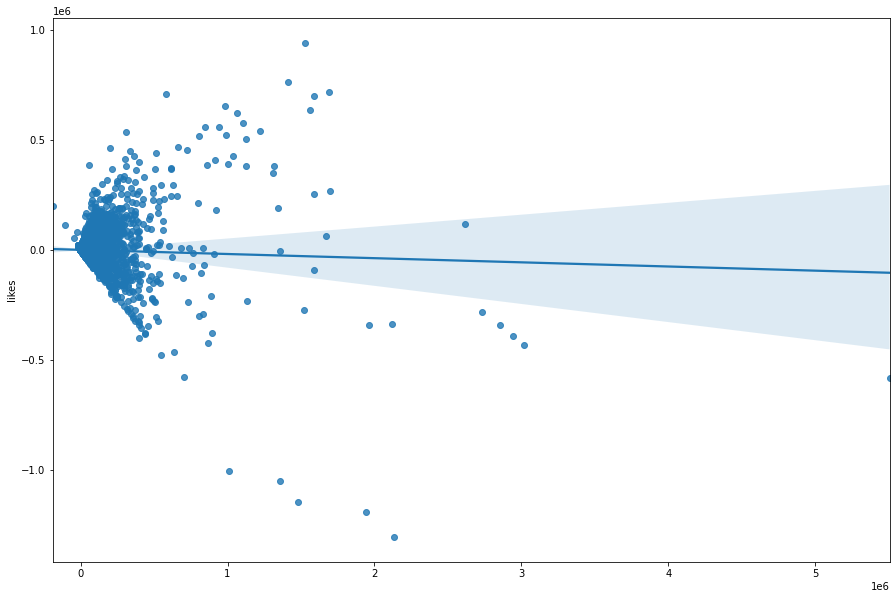

In [61]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions,y=residuals,fit_reg=True)

In [62]:
from sklearn import metrics

In [63]:
lm.score(X_test,y_test)

0.8394837715157999

In [64]:
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 19091.536265232953
MSE : 2915463692.957715
RMSE : 53995.03396570573


Will continue this kernal after learning more about text analysis / NLP, please leave any feedback for this notebook!